In [2]:
! ls Data

1519759656_39328483.csv
2017 PMP Data Final No Duplicates.xlsx
District_Province_Population
Federal_VDC_Relation_web.xlsx
nepal_population_household_ward-2011.csv
NM_2016_17clean.csv
NM_2016_17export.csv


In [3]:
#Import Maint Data Frame
import pandas as pd
import numpy as np

cleanpath='Data/NM_2016_17clean.csv'
df = pd.read_csv(cleanpath)

df.head()

,INCIDENT NUMBER,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,HLCIT CODE,LOCATION ACCURACY,...,Female Abducted,Youth -25 years or below- abducted,Total Buildings,Severe Building Damage,Total Vehicles,Severe Vehicle Damage,Election-related specific cause primary,Election-related specific cause secondary,Verification Feedback,VERIFIED
0,17685,Newspaper: Bank section of transportation mana...,2017-12-30,"Janakpur, Dhanusa, JANAKPUR, Central Developme...","Alert: Dhanusha/Dec 30, Yatayat byawastha kary...","News Media, Incident, Announcements / Demands,...",26.730245,85.927913,524 2 04 17 3 001,Municipality/VDC,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
1,17684,Janakpur Express: Madhesh movement victims pro...,2017-12-30,"Janakpur, Dhanusa, JANAKPUR, Central Developme...","Alert: Dhanusha/Dec 30, Tesro madhesh andolan ...","LOCAL COMMUNITIES, Protest / Demonstration, Ne...",26.727996,85.927458,524 2 04 17 3 001,Municipality/VDC,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
2,17675,Janakpur Express: Nawarang hotel vandalized | ...,2017-12-27,"Janakpur, Dhanusa, JANAKPUR, Central Developme...","Alert: Dhanusha/Dec 27, Janakpur ko shiva chow...","Nepal Police (responding), News Media, Vandali...",26.735339,85.936133,524 2 04 17 3 001,Municipality/VDC,...,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0
3,17670,Janakpur Today: Students padlocked technical s...,2017-12-23,"Dhanusadham, Dhanusa, JANAKPUR, Central Develo...","Alert: Dhanusha/Dec 23, Niyamit pathanpathan k...","News Media, District Education Office / MoE, I...",26.819670,86.055004,524 2 04 17 5 050,Municipality/VDC,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
4,17668,Janakpur Today: Students protest in front of D...,2017-12-22,"Rajbiraj, Saptari, SAGARMATHA, Eastern Develop...","Alert: Saptari/Dec 22, Little angels boarding ...","Nepal Police (responding), Protest / Demonstra...",26.501006,86.772946,524 1 03 15 5 033,Municipality/VDC,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0


In [4]:
df.columns

Index(['INCIDENT NUMBER', 'INCIDENT TITLE', 'INCIDENT DATE', 'LOCATION',
       'DESCRIPTION', 'CATEGORY', 'LATITUDE', 'LONGITUDE', 'HLCIT CODE',
       'LOCATION ACCURACY', 'Development Region', 'Zone', 'District',
       'Municipality/VDC', 'Ward', 'District(New)', 'Municipality/VDC(New)',
       'Ward(New)', 'SOURCE', 'SOURCE TYPE',
       'Peace Monitoring - General Information',
       'Event Date - Peace Monitoring',
       'Duration - only applicable to non-violent forms', 'Number of Injuries',
       'Violent vs non-violent', 'One-sided vs two-sided', 'Number of Deaths',
       'Collective vs interpersonal', 'Forms and Causes',
       'Event form - primary', 'Event form - secondary', 'Weapon', 'Weapon 2',
       'Cause - primary', 'Cause - secondary', 'Crosscutting issues',
       'Actor 1 - Perpetrator', 'Actor 1 - Number of People',
       'Actor 1 - Perpetrator Type', 'Actor 1 Entity Name',
       'Actor 1 - Youth -25 years or below- involvement',
       'Actor 2 - Perpetrat

In [5]:
df['INCIDENT DATE'] = pd.to_datetime(df['INCIDENT DATE'])

In [6]:
df.set_index(['INCIDENT NUMBER'])

,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,HLCIT CODE,LOCATION ACCURACY,Development Region,...,Female Abducted,Youth -25 years or below- abducted,Total Buildings,Severe Building Damage,Total Vehicles,Severe Vehicle Damage,Election-related specific cause primary,Election-related specific cause secondary,Verification Feedback,VERIFIED
INCIDENT NUMBER,,,,,,,,,,,,,,,,,,,,,
17685,Newspaper: Bank section of transportation mana...,2017-12-30,"Janakpur, Dhanusa, JANAKPUR, Central Developme...","Alert: Dhanusha/Dec 30, Yatayat byawastha kary...","News Media, Incident, Announcements / Demands,...",26.730245,85.927913,524 2 04 17 3 001,Municipality/VDC,Central Development Region,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
17684,Janakpur Express: Madhesh movement victims pro...,2017-12-30,"Janakpur, Dhanusa, JANAKPUR, Central Developme...","Alert: Dhanusha/Dec 30, Tesro madhesh andolan ...","LOCAL COMMUNITIES, Protest / Demonstration, Ne...",26.727996,85.927458,524 2 04 17 3 001,Municipality/VDC,Central Development Region,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
17675,Janakpur Express: Nawarang hotel vandalized | ...,2017-12-27,"Janakpur, Dhanusa, JANAKPUR, Central Developme...","Alert: Dhanusha/Dec 27, Janakpur ko shiva chow...","Nepal Police (responding), News Media, Vandali...",26.735339,85.936133,524 2 04 17 3 001,Municipality/VDC,Central Development Region,...,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0
17670,Janakpur Today: Students padlocked technical s...,2017-12-23,"Dhanusadham, Dhanusa, JANAKPUR, Central Develo...","Alert: Dhanusha/Dec 23, Niyamit pathanpathan k...","News Media, District Education Office / MoE, I...",26.819670,86.055004,524 2 04 17 5 050,Municipality/VDC,Central Development Region,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
17668,Janakpur Today: Students protest in front of D...,2017-12-22,"Rajbiraj, Saptari, SAGARMATHA, Eastern Develop...","Alert: Saptari/Dec 22, Little angels boarding ...","Nepal Police (responding), Protest / Demonstra...",26.501006,86.772946,524 1 03 15 5 033,Municipality/VDC,Eastern Development Region,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
17665,Janakpur Express: Students padlocked Rastriya ...,2017-12-19,"Gaushala, Mahottari, JANAKPUR, Central Develop...","Alert: Mahottari/Dec 19, Gausala nagarpalika-3...","Nepal Police (responding), News Media, Inciden...",26.908142,85.818365,524 2 04 18 5 068,Municipality/VDC,Central Development Region,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
17662,Daily Express: Husband accused of wife's murde...,2017-12-19,"Rautamai, Udayapur, SAGARMATHA, Eastern Develo...","Alert: Udaypur/Dec 19, Srimati ko hatya gareko...","Killings, DEATHS, Nepal Police (responding), A...",26.998131,86.653390,524 1 03 14 5 042,Municipality/VDC,Eastern Development Region,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
17657,Janakpur Today: Students padlocked school inde...,2017-12-17,"Hanumannagar Yoginimai, Saptari, SAGARMATHA, E...","Aalert: Saptari/Dec 17, Hanumannagar Kankalini...","News Media, Incident, Announcements / Demands,...",26.557267,86.846741,524 1 03 15 5 043,Municipality/VDC,Eastern Development Region,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
17651,Daily Express: Biplov cadre arrested on the ch...,2017-12-07,"Janakpur, Dhanusa, JANAKPUR, Central Developme...","Alert: Dhanusha/Dec 7, Chunab lai lakshit gari...","CPN, Nepal Police (responding), ARREST, News M...",26.709565,85.929479,524 2 04 17 3 001,Municipality/VDC,Central Development Region,...,0.0,0.0,0.0,0.0,0.0,0.0,Constestation regarding implementation and leg...,NaN,NaN,0


## Create a dataframe for plotting impacts

In [7]:
#Drop out irrelivant frames
impactsdroplist = ['Peace Monitoring - General Information','INCIDENT TITLE', 'LOCATION', 'INCIDENT NUMBER', 
       'DESCRIPTION',  'Development Region', 'Zone','SOURCE', 'SOURCE TYPE',
       'Municipality/VDC', 'Ward', 'District(New)', 'Municipality/VDC(New)',
       'Ward(New)',
       'Event Date - Peace Monitoring','LATITUDE', 'LONGITUDE','CATEGORY',
       'Duration - only applicable to non-violent forms', 'Number of Injuries',
       'Violent vs non-violent', 'One-sided vs two-sided', 'Number of Deaths',
       'Collective vs interpersonal', 'Forms and Causes',
       'Event form - primary', 'Event form - secondary', 'Weapon', 'Weapon 2',
       'Cause - primary', 'Cause - secondary', 'Crosscutting issues',
       'Actor 1 - Perpetrator', 'Actor 1 - Number of People',
       'Actor 1 - Perpetrator Type', 'Actor 1 Entity Name',
       'Actor 1 - Youth -25 years or below- involvement',
       'Actor 2 - Perpetrator 2 or Target', 'Actor 2 Numbers',
       'Target - if one-sided violence',
       'Perpetrator 2 - if two-sided violence', 'Actor 2 entity name',
       'Actor 2 - Youth -25 years or below- involvement', 'Impacts','Election-related specific cause secondary', 'Verification Feedback',
       'VERIFIED']
impactsdf = df.drop(impactsdroplist,axis=1)

#We will only sort by district, so incidents with a location lower location acurracy should be dropped.
ss = 'LOCATION ACCURACY'
#imask = ss[(ss == 'Zone') or (ss == 'Country') or (ss == 'Development Region')]
impactsdf = impactsdf[impactsdf[ss] != 'Zone']
impactsdf = impactsdf[impactsdf[ss] != 'Country']
impactsdf = impactsdf[impactsdf[ss] != 'Development Region']

impactsdf

,INCIDENT DATE,HLCIT CODE,LOCATION ACCURACY,District,Total Killed,Female Killed,Youth -25 years or below- killed,Total Injured,Female Injured,Youth -25 years or below- injured,...,Female no. Rape or Attempted Rape,Rape or Attempted Rape - Youth - 25 years or below,Total Abducted,Female Abducted,Youth -25 years or below- abducted,Total Buildings,Severe Building Damage,Total Vehicles,Severe Vehicle Damage,Election-related specific cause primary
0,2017-12-30,524 2 04 17 3 001,Municipality/VDC,Dhanusa,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2017-12-30,524 2 04 17 3 001,Municipality/VDC,Dhanusa,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2017-12-27,524 2 04 17 3 001,Municipality/VDC,Dhanusa,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
3,2017-12-23,524 2 04 17 5 050,Municipality/VDC,Dhanusa,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2017-12-22,524 1 03 15 5 033,Municipality/VDC,Saptari,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,2017-12-19,524 2 04 18 5 068,Municipality/VDC,Mahottari,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6,2017-12-19,524 1 03 14 5 042,Municipality/VDC,Udayapur,1.0,1.0,NaN,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7,2017-12-17,524 1 03 15 5 043,Municipality/VDC,Saptari,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,2017-12-07,524 2 04 17 3 001,Municipality/VDC,Dhanusa,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Constestation regarding implementation and leg...
9,2017-12-18,524 2 06 34 2 001,Municipality/VDC,Parsa,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [8]:
impactsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7072 entries, 0 to 7203
Data columns (total 21 columns):
INCIDENT DATE                                         7072 non-null datetime64[ns]
HLCIT CODE                                            7072 non-null object
LOCATION ACCURACY                                     7072 non-null object
District                                              7069 non-null object
Total Killed                                          4748 non-null float64
Female Killed                                         4747 non-null float64
Youth -25 years or below- killed                      4744 non-null float64
Total Injured                                         4747 non-null float64
Female Injured                                        4742 non-null float64
Youth -25 years or below- injured                     4719 non-null object
Total no. of Rape or Attempted Rape                   4748 non-null float64
Female no. Rape or Attempted Rape                     

In [9]:
#group and sum up df
imdist = impactsdf.groupby(['District']).sum()

imdate = impactsdf.groupby('INCIDENT DATE').sum()

#drop out values where these stats were not being recorded
imdate.dropna(axis=0,inplace=True)

imdate = imdate.sort_index()

#stats were not logged until midway through 2016. Let's just remove 2016

imdate = imdate['2017']

imdate


,Total Killed,Female Killed,Youth -25 years or below- killed,Total Injured,Female Injured,Total no. of Rape or Attempted Rape,Female no. Rape or Attempted Rape,Rape or Attempted Rape - Youth - 25 years or below,Total Abducted,Female Abducted,Youth -25 years or below- abducted,Total Buildings,Severe Building Damage,Total Vehicles,Severe Vehicle Damage
INCIDENT DATE,,,,,,,,,,,,,,,
2017-01-01,5.0,4.0,2.0,0.0,0.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2017-01-02,1.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2017-01-03,1.0,1.0,1.0,6.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-04,2.0,1.0,0.0,2.0,0.0,4.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-05,0.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-06,2.0,1.0,2.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2017-01-07,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-08,2.0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2017-01-09,2.0,2.0,1.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0


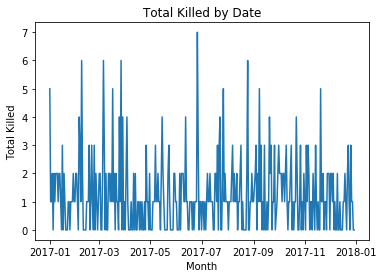

In [10]:
#try and plot something...  May be useful to seperate into provinces... return to this later
import matplotlib.pyplot as plt

plt.plot('Total Killed', data=imdate)
#plt.figure(figsize=(200,100))
plt.xlabel('Month')
plt.ylabel('Total Killed')
plt.title('Total Killed by Date')
plt.yticks()

plt.show()



In [11]:
#Lets try with districts and population 
imdist = impactsdf.groupby(['District']).sum()
imdist

,Total Killed,Female Killed,Youth -25 years or below- killed,Total Injured,Female Injured,Total no. of Rape or Attempted Rape,Female no. Rape or Attempted Rape,Rape or Attempted Rape - Youth - 25 years or below,Total Abducted,Female Abducted,Youth -25 years or below- abducted,Total Buildings,Severe Building Damage,Total Vehicles,Severe Vehicle Damage
District,,,,,,,,,,,,,,,
Achham,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arghakhanchi,7.0,3.0,1.0,10.0,6.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baglung,6.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Baitadi,4.0,4.0,2.0,10.0,3.0,4.0,4.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
Bajhang,4.0,2.0,1.0,61.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Bajura,5.0,0.0,3.0,50.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
Banke,17.0,6.0,6.0,77.0,9.0,26.0,26.0,20.0,0.0,0.0,0.0,3.0,0.0,11.0,1.0
Bara,21.0,11.0,11.0,41.0,5.0,3.0,3.0,3.0,1.0,0.0,0.0,1.0,0.0,21.0,13.0
Bardiya,4.0,3.0,1.0,34.0,1.0,5.0,5.0,4.0,0.0,0.0,0.0,5.0,4.0,6.0,2.0


In [12]:
#Import the data frame
pop_pd = pd.read_csv('Data/District_Province_Population')
pop_pd = pop_pd.set_index('District')
pop_pd = pop_pd.sort_index()
pop_pd

,Province,Population
District,,
Achham,7,256188.0
Arghakhanchi,5,196896.0
Baglung,4,260107.0
Baitadi,7,250225.0
Bajhang,7,194701.0
Bajura,7,134154.0
Banke,5,485164.0
Bara,2,690837.0
Bardiya,5,423656.0


In [13]:
#Test if district names are correct are correct - Prints out the districts that don't match. 
for num in range(75):
    test = imdist.index[num] == pop_pd.index[num]
    if test == False:
        print(pop_pd.index[num],imdist.index[num])

In [14]:
#Put the Province in the index and take a look. 
imdist_pop = pop_pd.join(imdist)
#imdist_pop = imdist_pop.sort_by('Province')
#imdist_pop = imdist_pop.set_index(['Province','District'])
imdist_pop

,Province,Population,Total Killed,Female Killed,Youth -25 years or below- killed,Total Injured,Female Injured,Total no. of Rape or Attempted Rape,Female no. Rape or Attempted Rape,Rape or Attempted Rape - Youth - 25 years or below,Total Abducted,Female Abducted,Youth -25 years or below- abducted,Total Buildings,Severe Building Damage,Total Vehicles,Severe Vehicle Damage
District,,,,,,,,,,,,,,,,,
Achham,7,256188.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arghakhanchi,5,196896.0,7.0,3.0,1.0,10.0,6.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baglung,4,260107.0,6.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Baitadi,7,250225.0,4.0,4.0,2.0,10.0,3.0,4.0,4.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
Bajhang,7,194701.0,4.0,2.0,1.0,61.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Bajura,7,134154.0,5.0,0.0,3.0,50.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
Banke,5,485164.0,17.0,6.0,6.0,77.0,9.0,26.0,26.0,20.0,0.0,0.0,0.0,3.0,0.0,11.0,1.0
Bara,2,690837.0,21.0,11.0,11.0,41.0,5.0,3.0,3.0,3.0,1.0,0.0,0.0,1.0,0.0,21.0,13.0
Bardiya,5,423656.0,4.0,3.0,1.0,34.0,1.0,5.0,5.0,4.0,0.0,0.0,0.0,5.0,4.0,6.0,2.0


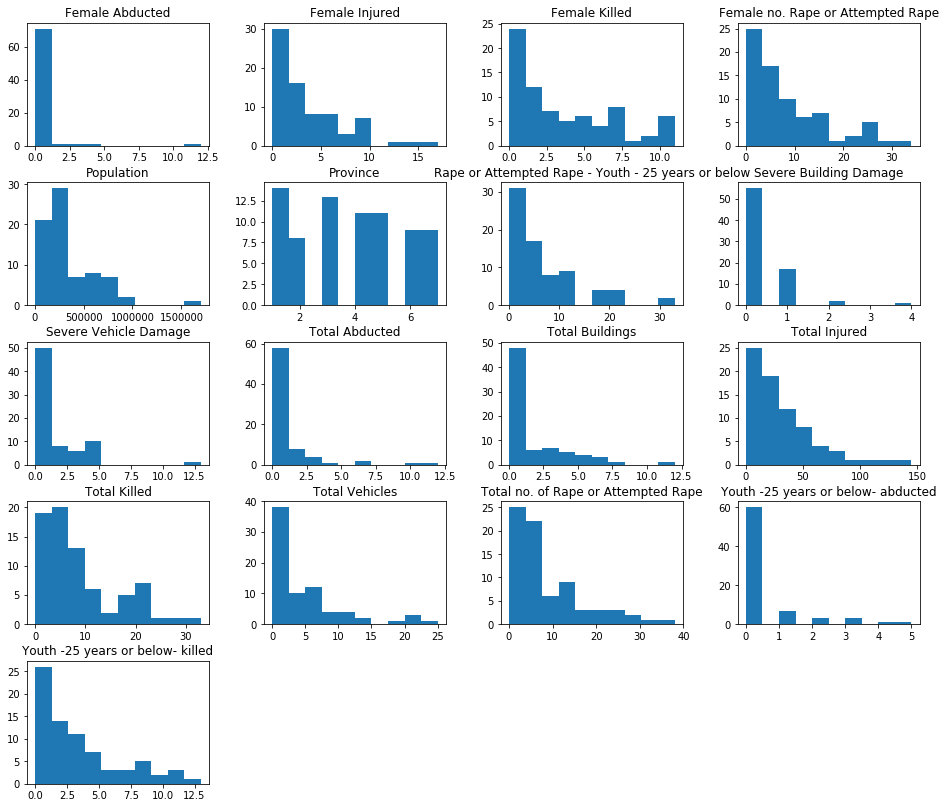

In [15]:
#Let's plot something!
#pop_v_total = imdist_pop[['Population','Total Killed']]
#x = 
imdist_pop.hist(figsize=(16,14), grid=False, sharey=False, sharex=False) 
#plt.figure()
plt.show()

A quick histogram plot of the Impacts dataframe shows most impacts falling along a frequency distribution in a normal way. That is - there are more districts with lower impact numbers and fewer districts with higher impact numbers. 

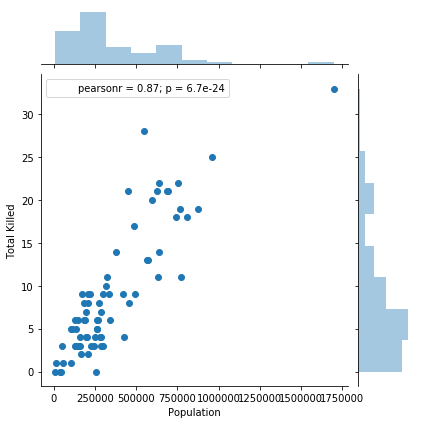

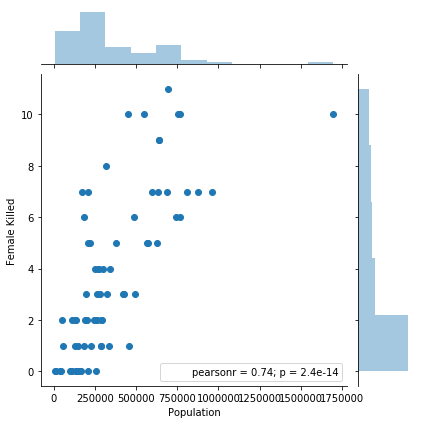

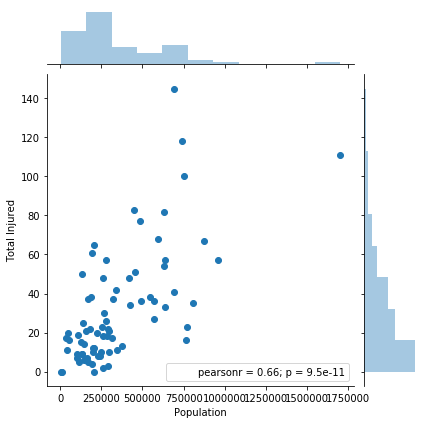

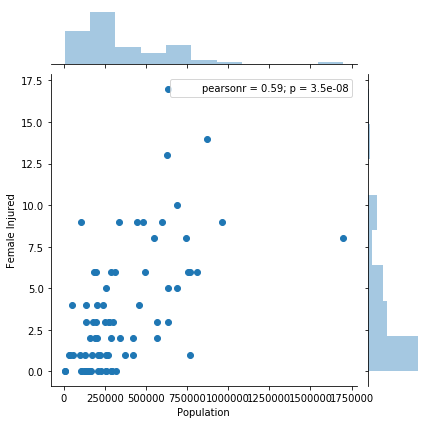

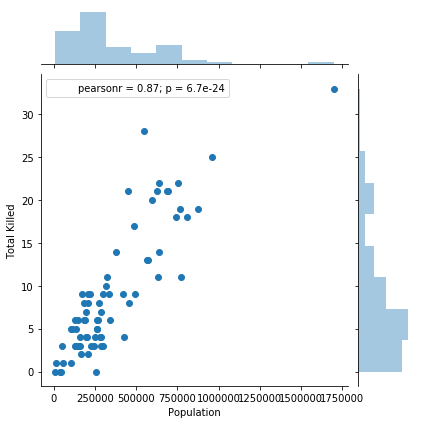

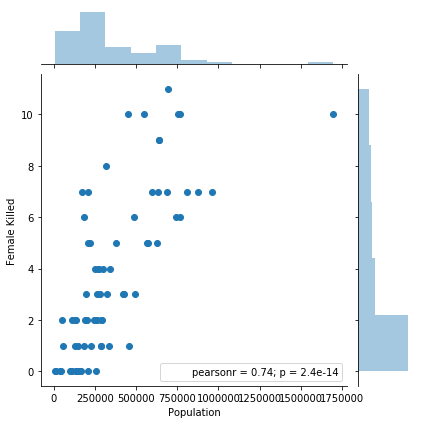

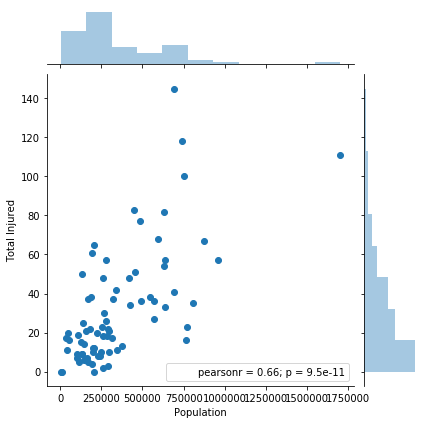

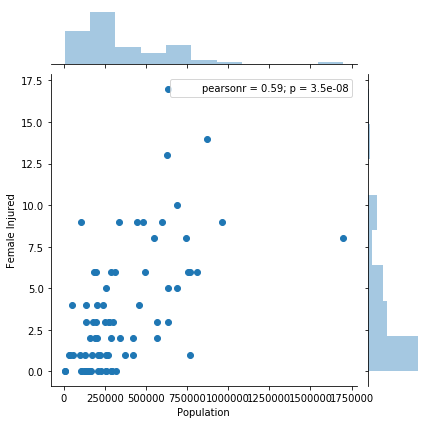

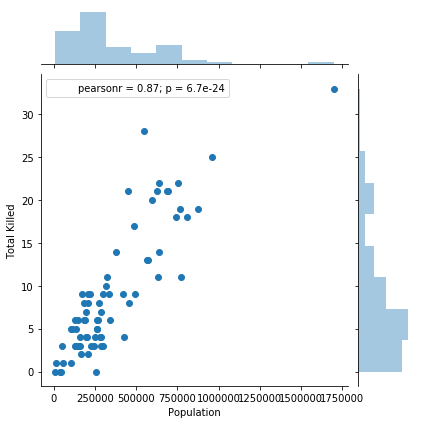

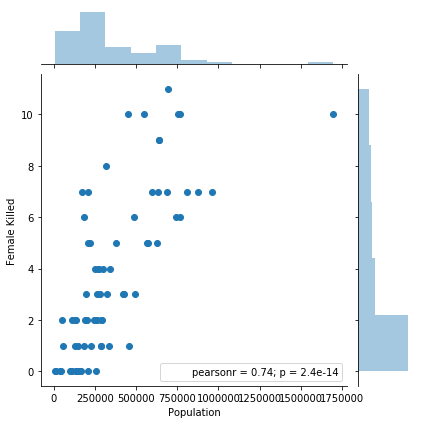

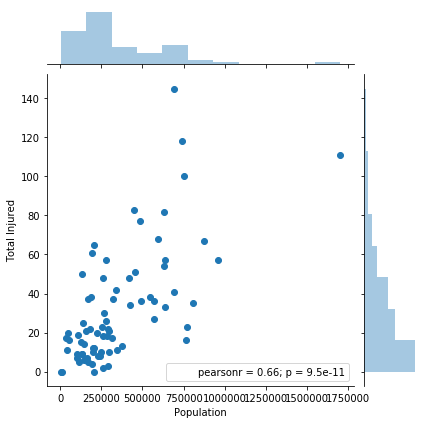

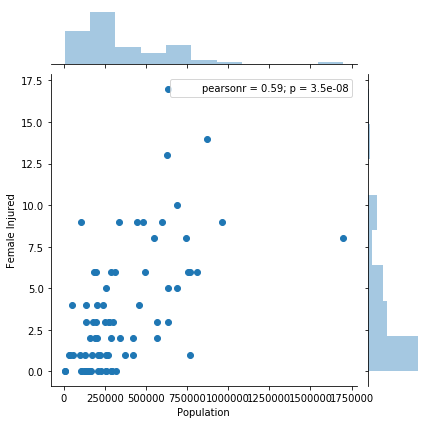

In [26]:
#Try some different seaborn plots to find relationships. Let's see if we can find outliers by population. 
import seaborn as sns


#landscape = (8.27, 11.7)
#fig, ax = pyplot.subplots(figsize=landscape)

sns.jointplot(x='Population', y='Total Killed', data=imdist_pop)
sns.jointplot(x='Population', y='Female Killed', data=imdist_pop)
sns.jointplot(x='Population', y='Total Injured', data=imdist_pop)
sns.jointplot(x='Population', y='Female Injured', data=imdist_pop)
#plt.subplots(2, 2, sharex='col')
#sns.xrot=60
#plt.figsize(16,16)
plt.show()

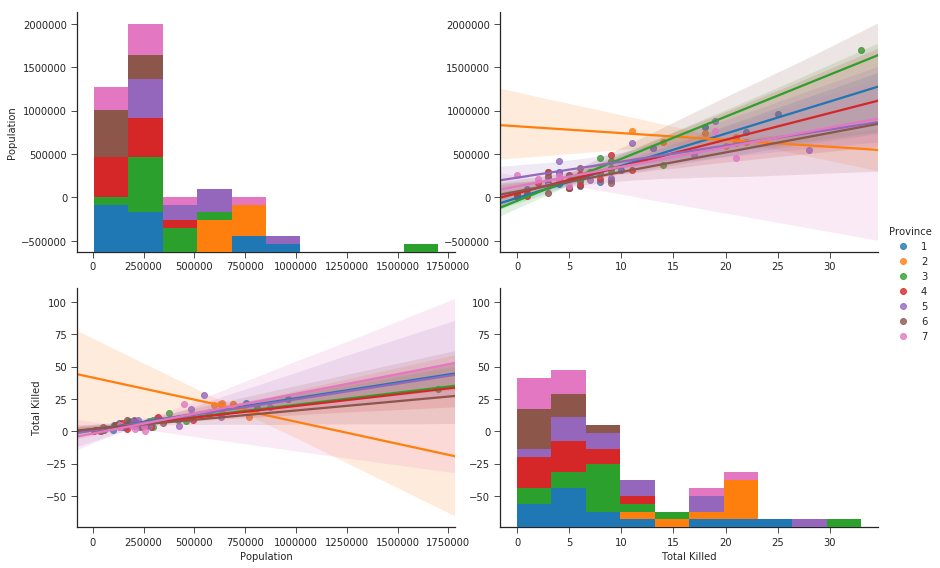

In [97]:
#try pairplot for the df
#malefemaledf = imdist_pop[['Province','Population','Total Killed','Female Killed']]
sns.pairplot(imdist_pop, kind='reg', hue='Province', vars=['Population','Total Killed'],size=4, aspect=1.5)
sns.despine()
plt.show()

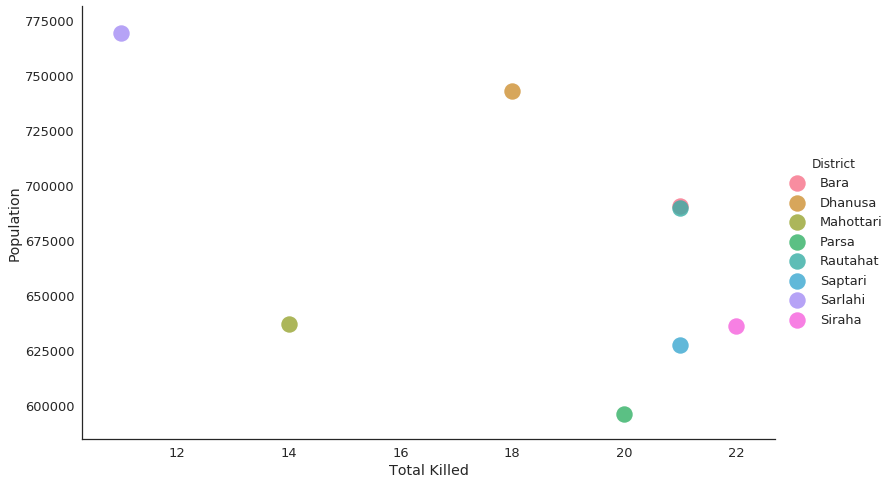

In [133]:
#Province 2 looks like an outlier for total killed in political violence. Let's plot it
#im_province2 = imdist_pop.loc[imdist_pop['Province'] == 2].reset_index()
#sns.barplot(y="District", x="Total Killed", data=im_province2, label="Deaths by Political Violence in Provice 2", color="b")
#sns.despine()
#plt.show()
#sns.barplot(y="District", x="Population", data=im_province2, label="Population by District", color="y")
#sns.despine()
#plt.show()
sns.set(font_scale=1.3)
sns.set_style("white")
sns.lmplot(y="Population", x="Total Killed", data=im_province2, hue="District", fit_reg=False,size=7, aspect=1.6, scatter_kws={"s": 270})
sns.despine()

plt.show()

In [ ]:
#Do heat map here

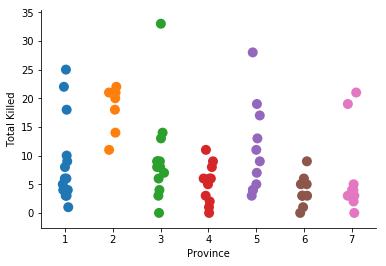

In [31]:
#Don't forget the jitter plots, you can do that districtwise, 
sns.stripplot(x='Province', y='Total Killed', data=imdist_pop, size=10, jitter=True)
sns.despine()
plt.show()